In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree


**Importing the dataset**

In [3]:
data=pd.read_csv('/Users/alok.g.v/Desktop/python practice/Guvi Task/Task7/Assignment11_to_16/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [4]:
gender_dum=pd.get_dummies(data['Gender'],prefix='Gender')
data=pd.concat([data,gender_dum],axis=1)
data

,User ID,Gender,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,Male,19,19000,0,0,1
1,15810944,Male,35,20000,0,0,1
2,15668575,Female,26,43000,0,1,0
3,15603246,Female,27,57000,0,1,0
4,15804002,Male,19,76000,0,0,1
...,...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,1,0
396,15706071,Male,51,23000,1,0,1
397,15654296,Female,50,20000,1,1,0
398,15755018,Male,36,33000,0,0,1


In [5]:
scaler=StandardScaler()
data['EstimatedSalary']=scaler.fit_transform(data[['EstimatedSalary']])
X=data[['Age','EstimatedSalary','Gender_Female','Gender_Male']]
y=data[['Purchased']]



**Feature Scaling**

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(280, 4) (120, 4) (280, 1) (120, 1)


**Fitting Decision Tree Classification to the Training set**

In [8]:
Dtree=DecisionTreeClassifier()
Dtree=Dtree.fit(X_train,y_train)

**Predicting the Test set results**

In [10]:
y_pred=Dtree.predict(X_test)
print(y_pred)
acc=accuracy_score(y_pred,y_test)
acc

[0 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0
 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0
 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 1 0 0]


0.8333333333333334

**Making the Confusion Matrix**

In [11]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[69,  9],
       [11, 31]])

**Visualising the Training set results**

[Text(1223.013698630137, 1316.53125, 'Age <= 43.5\ngini = 0.465\nsamples = 280\nvalue = [177, 103]\nclass = 0'),
 Text(733.8082191780823, 1231.59375, 'EstimatedSalary <= 0.639\ngini = 0.269\nsamples = 200\nvalue = [168, 32]\nclass = 0'),
 Text(428.05479452054794, 1146.65625, 'Age <= 36.5\ngini = 0.09\nsamples = 170\nvalue = [162, 8]\nclass = 0'),
 Text(366.9041095890411, 1061.71875, 'gini = 0.0\nsamples = 116\nvalue = [116, 0]\nclass = 0'),
 Text(489.2054794520548, 1061.71875, 'EstimatedSalary <= 0.404\ngini = 0.252\nsamples = 54\nvalue = [46, 8]\nclass = 0'),
 Text(428.05479452054794, 976.78125, 'EstimatedSalary <= -0.066\ngini = 0.204\nsamples = 52\nvalue = [46, 6]\nclass = 0'),
 Text(366.9041095890411, 891.84375, 'gini = 0.0\nsamples = 27\nvalue = [27, 0]\nclass = 0'),
 Text(489.2054794520548, 891.84375, 'Age <= 41.5\ngini = 0.365\nsamples = 25\nvalue = [19, 6]\nclass = 0'),
 Text(366.9041095890411, 806.90625, 'EstimatedSalary <= 0.022\ngini = 0.308\nsamples = 21\nvalue = [17, 4]\nc

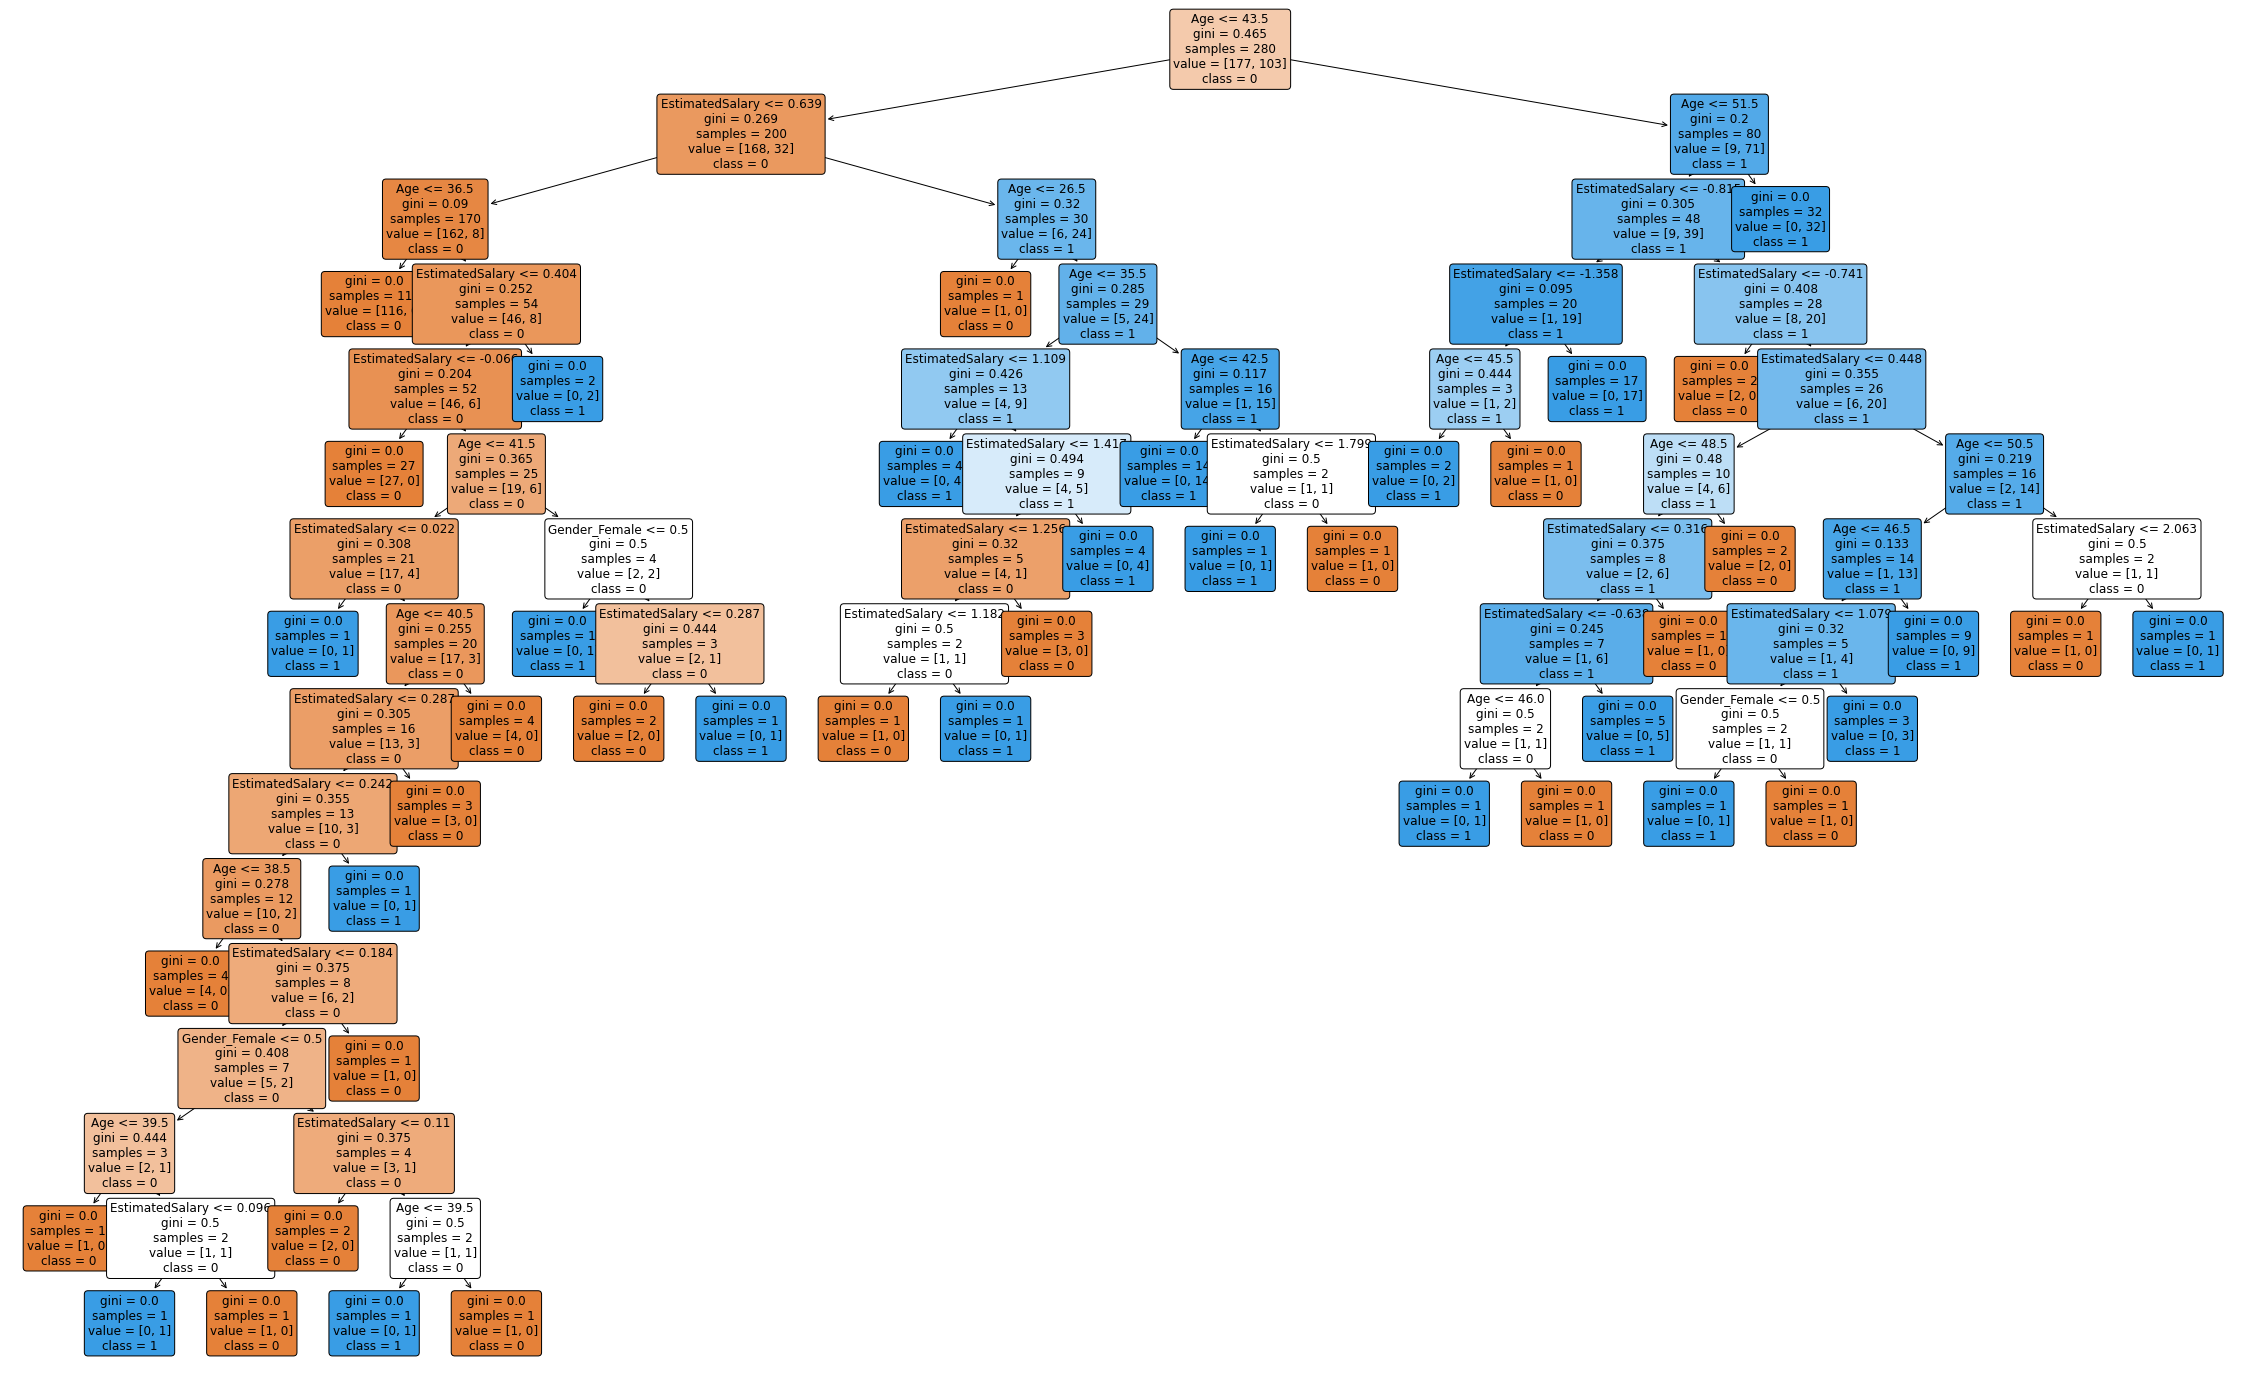

In [15]:
plt.figure(figsize=(40,25))

tree.plot_tree(Dtree,class_names=['0','1'],feature_names=X_train.columns, filled=True,rounded=True,fontsize=12)

**Visualising the Test set results**